In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [51]:
data = pd.read_csv(r"data/Crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [52]:
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [53]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [55]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [56]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [57]:
x=data.drop(['label'],axis=1)
y=data["label"]

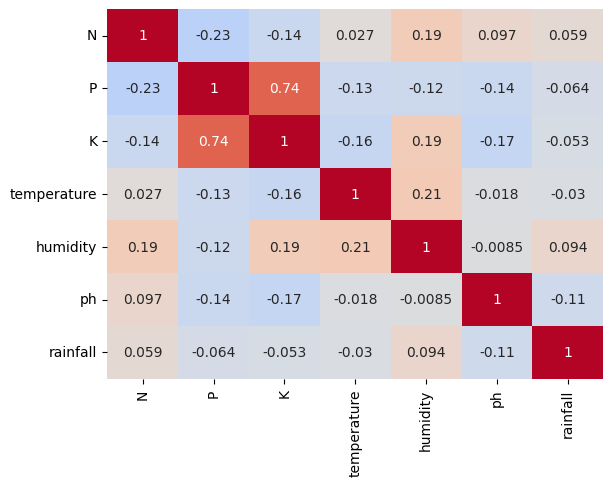

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap=cmap, cbar=False,vmin=-1, vmax=1)
plt.show()

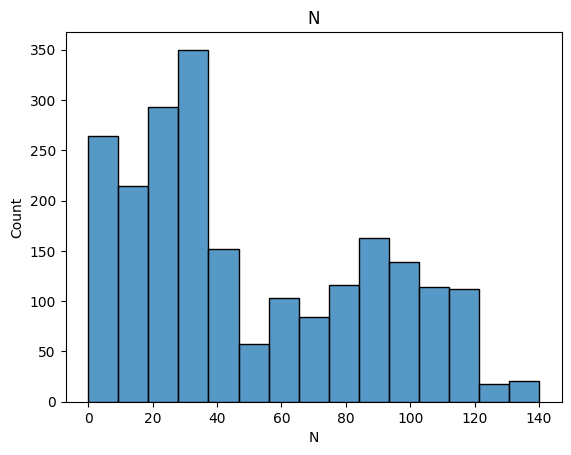

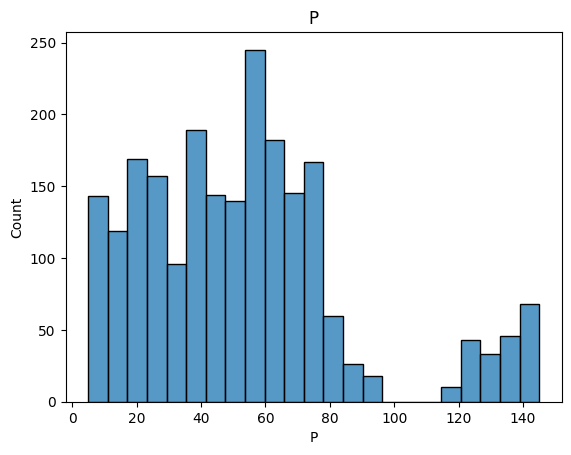

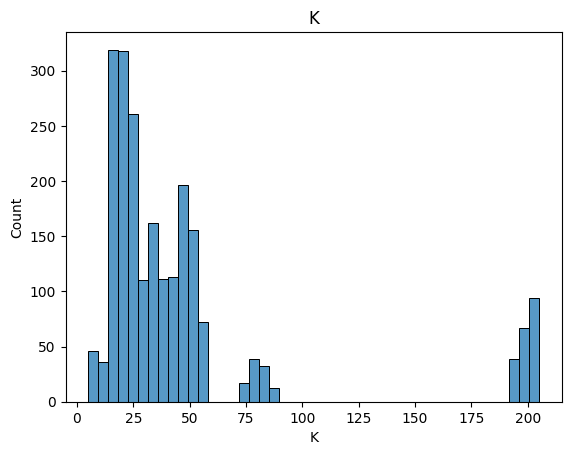

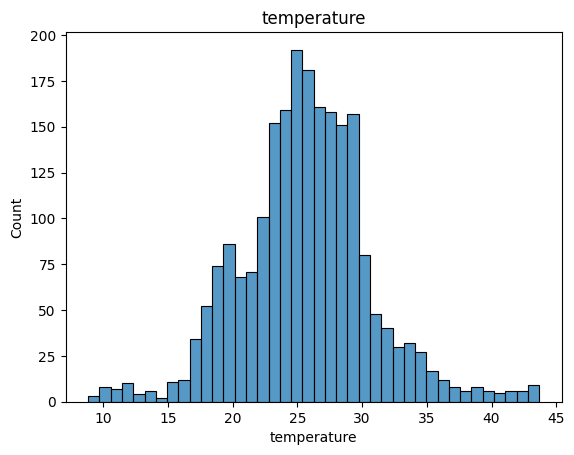

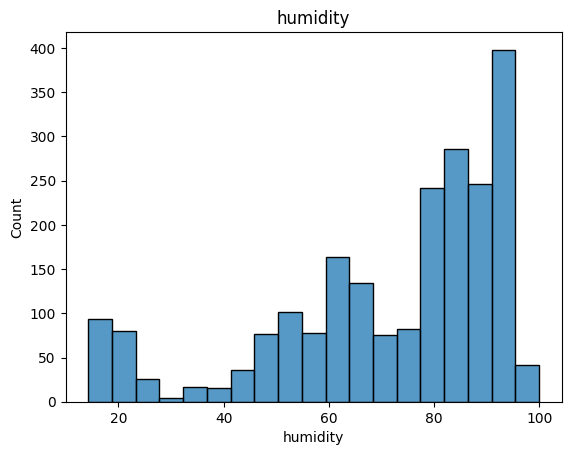

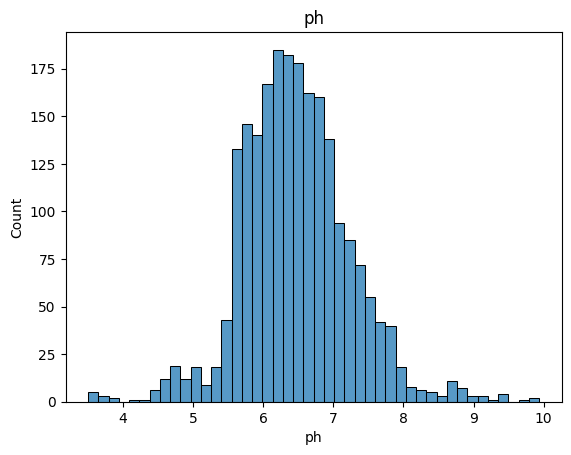

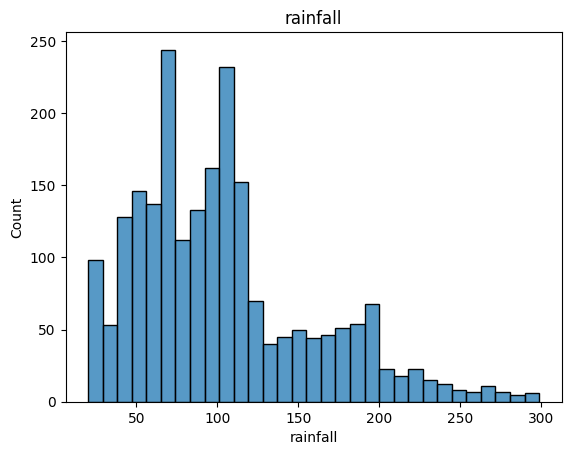

In [59]:
for col in x.columns:
    ax = sns.histplot(x=col, data=x)
    plt.title(col)
    plt.show()

In [60]:
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Text(0, 0.5, 'crops')

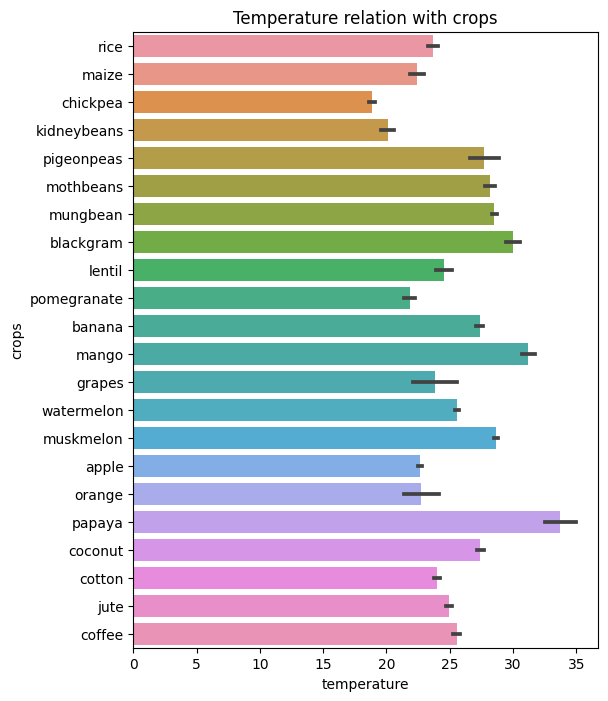

In [61]:
plt.figure(figsize=(6,8))
plt.title("Temperature relation with crops")
sns.barplot(y="label", x="temperature", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

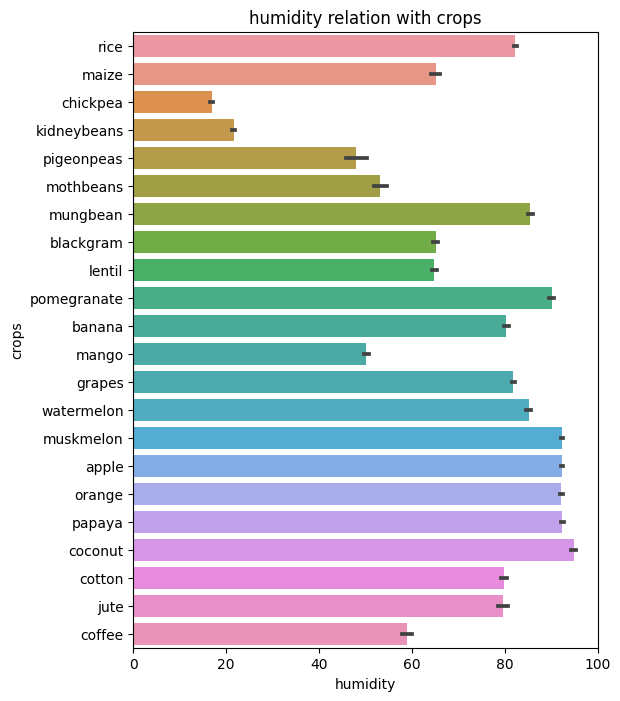

In [62]:
plt.figure(figsize=(6,8))
plt.title("humidity relation with crops")
sns.barplot(y="label", x="humidity", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

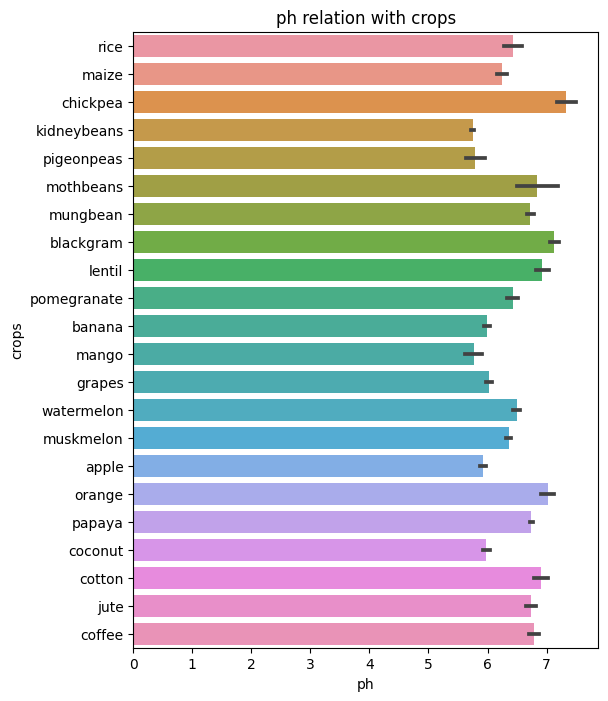

In [63]:
plt.figure(figsize=(6,8))
plt.title("ph relation with crops")
sns.barplot(y="label", x="ph", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

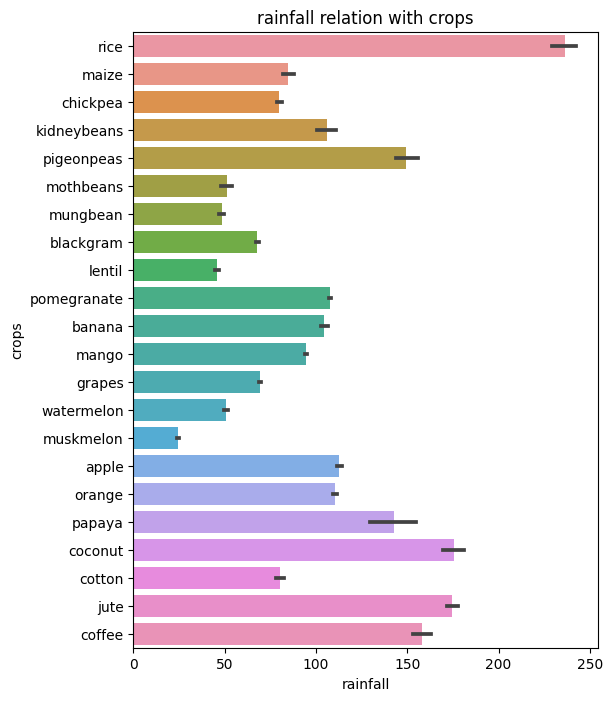

In [64]:
plt.figure(figsize=(6,8))
plt.title("rainfall relation with crops")
sns.barplot(y="label", x="rainfall", data=data)
plt.ylabel("crops")

In [65]:
from sklearn.preprocessing import StandardScaler

x_standardized = x.copy()
for col in x_standardized.columns:
    x_standardized[col] = StandardScaler().fit_transform(x_standardized[col].values.reshape(-1, 1))
    
x_standardized.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pcs = pca.fit_transform(x_standardized.values)
data_pca = pd.DataFrame(data = data_pcs, columns = ["pc_1", "pc_2", "pc_3"])

data_pca = pd.concat([data_pca, y], axis = 1)
data_pca

,pc_1,pc_2,pc_3,label
0,-0.582869,-0.844586,1.373343,rice
1,-0.474635,-0.784895,1.252178,rice
2,-0.634068,-0.694522,1.179332,rice
3,-1.047920,-1.087658,1.393351,rice
4,-0.873258,-0.658673,1.455685,rice
...,...,...,...,...
2195,-1.260921,-0.618363,0.711297,coffee
2196,-1.355583,-0.154043,0.701649,coffee
2197,-1.158384,-0.640475,1.045840,coffee
2198,-1.219188,0.052390,0.180855,coffee


In [67]:
import plotly.express as px
data_avg_pca_proximity = data_pca.groupby('label')[['pc_1', 'pc_2', 'pc_3']].mean()

fig = px.scatter_3d(data_avg_pca_proximity, x='pc_1', y='pc_2', z='pc_3',
                    color = data_avg_pca_proximity.index,
                    text = data_avg_pca_proximity.index, 
                    title = "Which Crops Need Similar Conditions?",
                    template = 'none')
fig.update_layout(showlegend=False)
fig.show()

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=30)

In [69]:
y_train

382     kidneybeans
1756         papaya
1842        coconut
2122         coffee
270        chickpea
           ...     
919     pomegranate
1164          mango
500       mothbeans
421      pigeonpeas
1829        coconut
Name: label, Length: 1540, dtype: object

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 20,random_state=30)
 

rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=30)

In [71]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(x_test)

rfc_accuracy=accuracy_score(y_test,y_pred)
rfc_accuracy

0.9939393939393939

In [72]:
confusion_matrix(y_test,y_pred)

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        31
   blackgram       0.96      1.00      0.98        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        32
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        33
       maize       1.00      0.97      0.99        36
       mango       1.00      1.00      1.00        25
   mothbeans       0.97      1.00      0.98        28
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        42
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

# model accuracy
from sklearn import metrics

naive_bayes_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", naive_bayes_accuracy)

Accuracy: 1.0


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        31
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        32
        jute       1.00      1.00      1.00        26
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        35
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        42
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [76]:
confusion_matrix(y_test,y_pred)

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

In [77]:
from sklearn.svm import SVC
svc = SVC(kernel='linear') # Linear Kernel
y_pred = svc.fit(x_train, y_train).predict(x_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", svc_accuracy)

Accuracy: 0.996969696969697


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        31
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        32
        jute       0.96      0.96      0.96        26
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        35
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        42
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [79]:
confusion_matrix(y_test,y_pred)

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

In [80]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 66)
y_pred = log_reg.fit(x_train, y_train).predict(x_test)

logistic_regression_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", logistic_regression_accuracy)

Accuracy: 0.9621212121212122


c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       0.91      1.00      0.95        20
      banana       1.00      1.00      1.00        31
   blackgram       0.84      0.78      0.81        27
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      0.97      0.99        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.94      0.97        32
      grapes       1.00      1.00      1.00        32
        jute       0.92      0.92      0.92        26
 kidneybeans       1.00      0.97      0.98        31
      lentil       0.91      0.94      0.92        31
       maize       0.94      0.94      0.94        35
       mango       0.96      1.00      0.98        24
   mothbeans       0.86      0.89      0.88        28
    mungbean       0.94      0.97      0.95        30
   muskmelon       1.00      1.00      1.00        42
      orange       1.00      1.00      1.00        22
      papaya       0.94    

In [82]:
confusion_matrix(y_test,y_pred)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

In [96]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rfc.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9939


In [83]:
classification_performance = {'Classification Procedure': ['Naive Bayes', 'Logistic Regression', 'SVC', 'Random Forest'],
                              'Accuracy': [naive_bayes_accuracy, logistic_regression_accuracy, svc_accuracy, rfc_accuracy]}

classification_performance = pd.DataFrame.from_dict(classification_performance)
classification_performance

,Classification Procedure,Accuracy
0,Naive Bayes,1.000000
1,Logistic Regression,0.962121
2,SVC,0.996970
3,Random Forest,0.993939


In [84]:
names = data['label'].unique()
def recommend(X):
    probability=rfc.predict_proba(X)
    probability = sorted( [(x,i) for (i,x) in enumerate(probability[0])], reverse=True)
    for i,j in probability[:3]:
        print(names[j])
recommend(x_test.sample(1))

coconut
chickpea
coffee


In [93]:
data[data.label=='orange']

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.781442,92.510777,6.354007,119.035002,orange
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange
1602,27,13,6,13.360506,91.356082,7.335158,111.226688,orange
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange
1604,20,7,9,29.477417,91.578029,7.129137,111.172750,orange
...,...,...,...,...,...,...,...,...
1695,27,30,5,32.717485,90.546083,7.656978,113.328978,orange
1696,13,8,12,25.162966,92.547360,7.105905,114.311720,orange
1697,6,7,7,27.681673,94.473169,7.199106,113.999515,orange
1698,40,17,15,21.350934,90.949297,7.871063,107.086209,orange


In [92]:
rfc.predict([[40,150,200,27.879744,88.002744,5.502985,66.935536]])

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['grapes'], dtype=object)

In [86]:
rfc.predict([[100,50,50,50,100,100,100]])

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['papaya'], dtype=object)